# Trabalho

In [1]:
import pandas as pd
import numpy as np

In [2]:
water = pd.read_csv('https://raw.githubusercontent.com/pinheiro-lucas/water-potability/main/data/water_potability.csv', sep=',')

In [3]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
water.fillna(water.mean(), inplace=True)

In [8]:
water.Potability.value_counts() # quantidade de dados para mostrar a nescecidade de balancear os dados

Potability
0    1998
1    1278
Name: count, dtype: int64

In [9]:
# notpotable  = data[data['Potability']==0]
# potable = data[data['Potability']==1]

from sklearn.utils import resample
df_minority_upsampled = resample(
  water[water['Potability']==1],
  replace = True,
  n_samples = 1998
)

from sklearn.utils import shuffle
water = pd.concat([water[water['Potability']==0], df_minority_upsampled])
water = shuffle(water)

In [10]:
water.Potability.value_counts()

Potability
1    1998
0    1998
Name: count, dtype: int64

In [11]:
water.corr()["Potability"]

ph                -0.008018
Hardness          -0.020076
Solids             0.037682
Chloramines        0.032461
Sulfate           -0.001649
Conductivity      -0.010522
Organic_carbon    -0.032487
Trihalomethanes    0.007883
Turbidity         -0.000051
Potability         1.000000
Name: Potability, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split

y = water["Potability"]
x = water.drop(columns=["Potability"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [13]:
# Initialize the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.8165137614678899


8) Instancia um objeto chamado **classificador_svm**

In [14]:
from sklearn.svm import SVC

classificador_svm = SVC()

9) Treine seu algoritmo e gere um Modelo, explique de forma simples o que é um **modelo**

In [15]:
classificador_svm.fit(X_train, y_train)

SVC()

Explicação:
O modelo é um tentativa de identificar uma correlação de dados, para gerar previsões baseados em novos dados que possam ser aplicados nessa correlação.

10) Valide seu modelo imprimindo o valor de acurácia:

In [16]:
previsoes = classificador_svm.predict(X_test)


from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, previsoes)

0.4945788156797331

/////////////////////////


array([[<Axes: title={'center': 'ph'}>,
        <Axes: title={'center': 'Hardness'}>,
        <Axes: title={'center': 'Solids'}>],
       [<Axes: title={'center': 'Chloramines'}>,
        <Axes: title={'center': 'Sulfate'}>,
        <Axes: title={'center': 'Conductivity'}>],
       [<Axes: title={'center': 'Organic_carbon'}>,
        <Axes: title={'center': 'Trihalomethanes'}>,
        <Axes: title={'center': 'Turbidity'}>],
       [<Axes: title={'center': 'Potability'}>, <Axes: >, <Axes: >]],
      dtype=object)

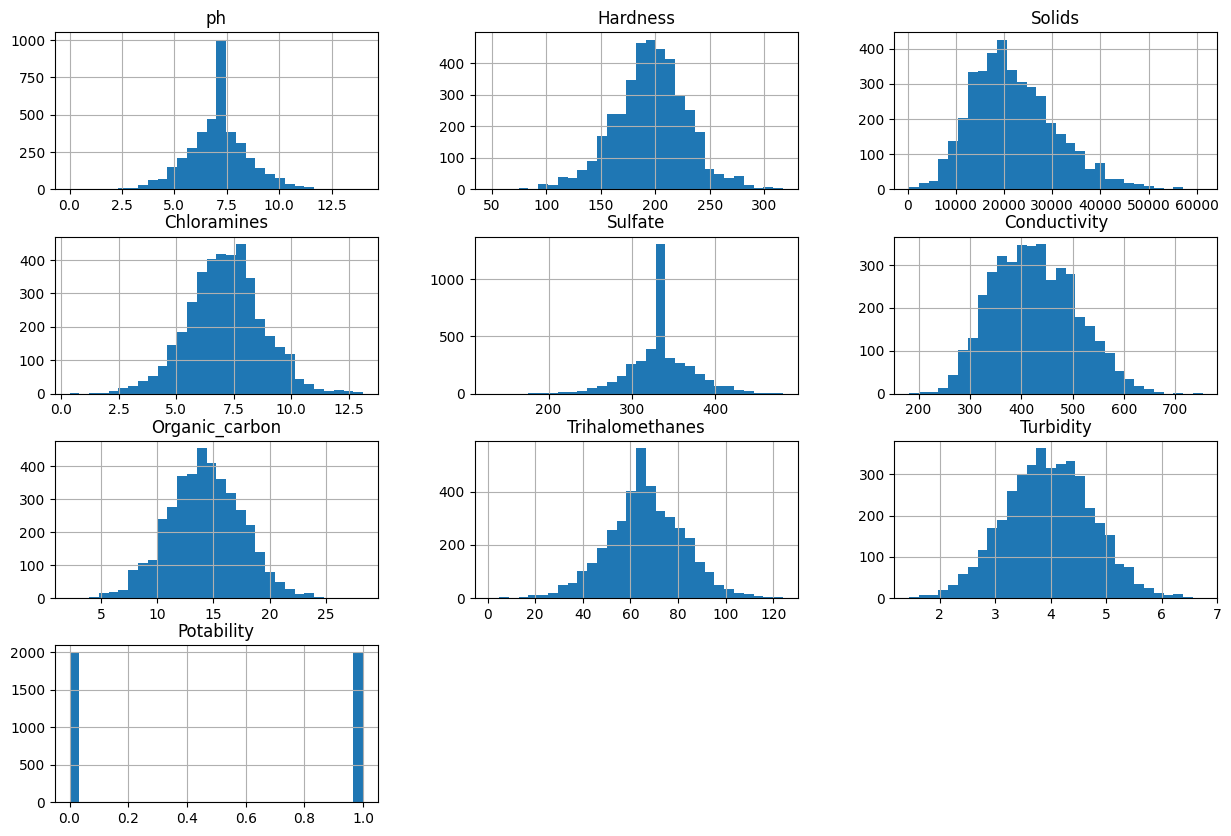

In [17]:
water.hist(bins=30, figsize=(15, 10))

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train_scaled, y_train)

y_pred = logreg.predict(x_test_scaled)

y_pred[:10]

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

In [19]:
ac = accuracy_score(y_test, y_pred)
pr = precision_score(y_test, y_pred)
re = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

ac, pr, re, f1

(0.5237698081734778,
 0.5617977528089888,
 0.3993610223642173,
 0.4668534080298787)

In [20]:
confusion_matrix(y_test, y_pred)

array([[378, 195],
       [376, 250]], dtype=int64)

In [21]:
# from sklearn.feature_selection import SelectKBest, chi2

# sel = SelectKBest(score_func=chi2, k=3)
# X_train_opt = sel.fit_transform(X_train, y_train)
# X_test_t = sel.transform(X_test)

# model = LogisticRegression(random_state=42)
# model.fit(X_train_opt, y_train)

# # Avaliar o modelo
# train_score = model.score(X_train_opt, y_train)
# test_score = model.score(X_test_t, y_test)

# print("Acurácia sem otimização:", train_score)
# print("Acurácia com otimizado:", test_score)

In [22]:
x = water[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]

c = pd.DataFrame(logreg.coef_[0], x.columns)
c

,0
ph,-0.017752
Hardness,-0.031326
Solids,0.078461
Chloramines,0.046373
Sulfate,-0.017605
Conductivity,-0.058821
Organic_carbon,-0.062815
Trihalomethanes,0.015216
Turbidity,0.001828


In [23]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import pandas as pd

# Load your data
df = pd.read_csv('https://raw.githubusercontent.com/pinheiro-lucas/water-potability/main/data/water_potability.csv', sep=',')


In [24]:
df.isnull().sum()


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [25]:
# data = df.dropna()
df.fillna(df.mean(), inplace=True)
data = df

In [26]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [27]:
data.Potability.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [28]:
notpotable  = data[data['Potability']==0]
potable = data[data['Potability']==1]

from sklearn.utils import resample
df_minority_upsampled = resample(potable, replace = True, n_samples = 1200)

from sklearn.utils import shuffle
data = pd.concat([notpotable, df_minority_upsampled])
data = shuffle(data)

In [29]:
data.Potability.value_counts()

Potability
0    1998
1    1200
Name: count, dtype: int64

In [30]:
corr = data.corr()
corr["Potability"]

ph                -0.009648
Hardness          -0.030723
Solids             0.040243
Chloramines        0.047302
Sulfate           -0.016854
Conductivity      -0.002233
Organic_carbon    -0.033515
Trihalomethanes    0.027901
Turbidity          0.024150
Potability         1.000000
Name: Potability, dtype: float64

In [31]:
# Split features and target
X = data.drop(['Potability'], axis = 1)
y = data['Potability']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.8145833333333333
